# Goal
Apply gradient descent to minimize the error of a liner regression

In [70]:
import numpy as np
import matplotlib.pyplot as plt

### Functions

In [65]:
# this function iterates over the elements and returns
# true if all of them are below the tolerance threshold
def below_tolerance(movement, tolerance):
	for i in movement:
		if i < 0:
			i = -i
		if i > tolerance:
			return False
	return True

In [66]:
# SSR
#this is the derivative of the cost function, returns the gradient vector
# b0 = derivative in order to the intercept
# b1 = derivative in order to the first parameter
def	gradient_vector(x, y, start):
	deriv = start[0] + start[1] * x - y
	b0 = 2 * deriv.sum()
	b1 = 2 * (deriv * x).sum()
	return b0, b1

At first I used the SSR, but it resulted in a too big step so I changed to the MSE and it seems to be working now

In [67]:
# MSE
#this is the derivative of the cost function, returns the gradient vector
# b0 = derivative in order to the intercept
# b1 = derivative in order to the first parameter
def	gradient_vector(x, y, start):
	deriv = start[0] + start[1] * x - y
	b0 = 2 * deriv.mean()
	b1 = 2 * (deriv * x).mean()
	return b0, b1

In [68]:
# this function returns the parameters b0 and b1 that create the linear regression
# closer to obs_x and obs_y
# the starting point is an initial selection for the parameters that is updated
# until the improvement is marginal (below tolerance) or the model has been run 
# enough times
def gradient_descent(gradient_vector, obs_x, obs_y, starting_point,
		learning_rate=0.0005, max_iter=100, tolerance=0.001):
	position = starting_point
	if max_iter < 1:
		raise ValueError("The number of iterations should be greater than 0")
	if tolerance < 0:
		raise ValueError("The tolerance can't be negative")
	if learning_rate <= 0:
		raise ValueError("The learning rate has to be greater than 0, otherwise you ain't learning")
	i = 0
	while i < max_iter:
		movement = learning_rate * np.array(gradient_vector(obs_x, obs_y, position))
		if below_tolerance(movement, tolerance):
			break
		position -= movement
	return position

In [78]:
def scatter_plot(x, y):
	fig = plt.figure()
	fig.patch.set_facecolor('white')
	plt.scatter(x, y, c ="blue")
	plt.xlabel("X-axis")
	plt.ylabel("Y-axis")
	plt.show()

The elements must be an np.array because listA + listB will concatenate, while arrayA+arrayB will return an array of the sum of each element (must be the same size)

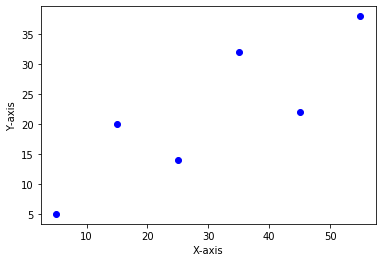

array([1.99430207, 0.63213599])

In [79]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

scatter_plot(x, y)
gradient_descent(gradient_vector = gradient_vector, obs_x = x, obs_y = y,
	starting_point=[2,1])

